# importando bibliotecas

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

# carregando dados

In [34]:
#Lendo os dados com pandas 
dados = pd.read_csv("winequality-red.csv")

#exibindo os cinco primeiros do dataset
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
# Adicionando nome ID na primeira coluna 
dados.rename_axis("ID", axis = 'columns', inplace = True)
dados.head()

ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Distribuições de frequência com variáveis quantitativas

In [36]:
#variável quantitativa do pH
dados.pH.min()

2.74

In [37]:
dados.pH.max()

4.01

In [38]:
classes = [0, 3.3, 3.6, 6.9, 7.1, 14]
labels = ['Ácido Azedo', 'Ácido Ideal', 'Ácido' , 'Neutro', 'Alcalino']

pd.cut(x = dados.pH,bins = classes,labels = labels, include_lowest = True )

0       Ácido Ideal
1       Ácido Azedo
2       Ácido Azedo
3       Ácido Azedo
4       Ácido Ideal
           ...     
1594    Ácido Ideal
1595    Ácido Ideal
1596    Ácido Ideal
1597    Ácido Ideal
1598    Ácido Ideal
Name: pH, Length: 1599, dtype: category
Categories (5, object): ['Ácido Azedo' < 'Ácido Ideal' < 'Ácido' < 'Neutro' < 'Alcalino']

In [39]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.pH,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.pH,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_pH = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_pH.rename_axis('pH', axis= 'columns', inplace = True)

dist_freq_pH.sort_index(ascending = True, inplace = True)

dist_freq_pH

pH,Frequência,Porcentagem (%)
Ácido Azedo,783,48.968105
Ácido Ideal,768,48.030019
Ácido,48,3.001876
Neutro,0,0.000000
Alcalino,0,0.000000


In [40]:
#número de registros e a quantidade de variáveis
n = dados.shape
n

(1599, 12)

In [41]:
#para pegar só o número de registros
n = dados.shape[0]
n

1599

In [42]:
#descobrir o número de classes de amplitude fixa por meio da regra de Sturges

k = 1 + (10 /3) * np.log10(n) 
k 

11.679494879154115

In [43]:
#arredondando  a variável k
k = k.round(0)
k

12.0

In [44]:
k = int(k.round(0))
k

12

In [45]:
#utilizando value_counts() para distribuição de frequencia
pd.value_counts(
    pd.cut(
        x = dados.density,
        bins = 12,
        include_lowest = True
    )
)

(0.996, 0.997]    419
(0.997, 0.998]    397
(0.995, 0.996]    272
(0.998, 0.999]    182
(0.999, 1.0]      108
(0.993, 0.995]    105
(0.992, 0.993]     45
(1.0, 1.001]       32
(0.991, 0.992]     13
(1.001, 1.003]      9
(1.003, 1.004]      9
(0.989, 0.991]      8
Name: density, dtype: int64

In [46]:
#para ordenar do menor ao maior registro e adicionar os atributos frequencia e percentual para gerar novo DataFrame
frequencia = pd.value_counts(
    pd.cut(
        x = dados.density,
        bins = 12,
        include_lowest = True
    ),
    sort = False
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.density,
        bins = 12,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)


dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(0.989, 0.991]",8,0.005003
"(0.991, 0.992]",13,0.008130
"(0.992, 0.993]",45,0.028143
"(0.993, 0.995]",105,0.065666
"(0.995, 0.996]",272,0.170106
"(0.996, 0.997]",419,0.262039
"(0.997, 0.998]",397,0.248280
"(0.998, 0.999]",182,0.113821
"(0.999, 1.0]",108,0.067542
"(1.0, 1.001]",32,0.020013


In [47]:
dist_freq_quantitativas_amplitude_fixa.rename_axis('density', axis= 'columns', inplace = True)
dist_freq_quantitativas_amplitude_fixa

density,Frequência,Porcentagem (%)
"(0.989, 0.991]",8,0.005003
"(0.991, 0.992]",13,0.008130
"(0.992, 0.993]",45,0.028143
"(0.993, 0.995]",105,0.065666
"(0.995, 0.996]",272,0.170106
"(0.996, 0.997]",419,0.262039
"(0.997, 0.998]",397,0.248280
"(0.998, 0.999]",182,0.113821
"(0.999, 1.0]",108,0.067542
"(1.0, 1.001]",32,0.020013


# Medidas de tendencia central

In [48]:
#cálculo da média
dados.alcohol.mean()

10.422983114446502

In [49]:
dados.density.mean()

0.9967466791744831

In [50]:
dados['volatile acidity'].mean()

0.5278205128205131

In [51]:
dados['citric acid'].mean()

0.2709756097560964

In [52]:
#calculo mediana
dados.alcohol.median()

10.2

In [53]:
dados.density.median()

0.99675

In [54]:
dados['volatile acidity'].median()

0.52

In [55]:
dados['citric acid'].median()

0.26

In [56]:
n = dados.shape[1]
n

12

In [57]:
# cálculo da moda
dados.alcohol.mode()

0    9.5
Name: alcohol, dtype: float64

In [58]:
dados.density.mode()

0    0.9972
Name: density, dtype: float64

In [59]:
dados['volatile acidity'].mode()

0    0.6
Name: volatile acidity, dtype: float64

In [60]:
dados['citric acid'].mode()

0    0.0
Name: citric acid, dtype: float64

# Relação entre as medidas de tendência central e histogramas

C:\Users\adson.damasceno\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Densidade'}, xlabel='g/mL'>

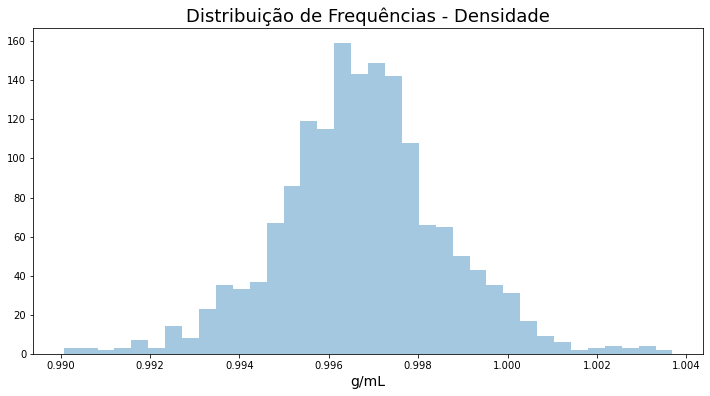

In [61]:
ax = sns.distplot(dados.density, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Densidade', fontsize=18)
ax.set_xlabel('g/mL', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Densidade  com KDE'}, xlabel='g/mL', ylabel='Density'>

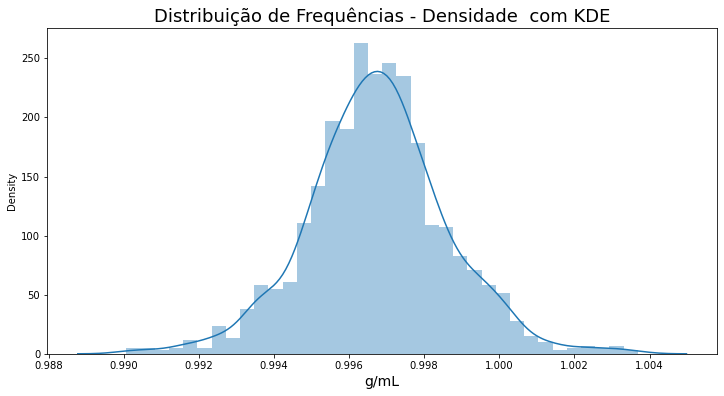

In [62]:
# com KDE
ax = sns.distplot(dados.density)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Densidade  com KDE', fontsize=18)
ax.set_xlabel('g/mL', fontsize=14)
ax

C:\Users\adson.damasceno\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

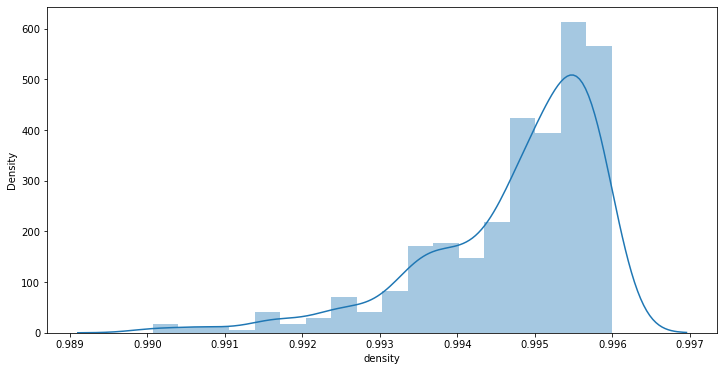

In [63]:
ax = sns.distplot(dados.query('density < 0.996').density)
ax.figure.set_size_inches(12, 6)
ax

In [64]:
Moda = dados.density.mode()[0]
Moda

0.9972

In [65]:
Mediana = dados.density.median()
Mediana

0.99675

In [66]:
Media = dados.density.mean()
Media

0.9967466791744831

In [67]:
Moda > Mediana > Media

True

C:\Users\adson.damasceno\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

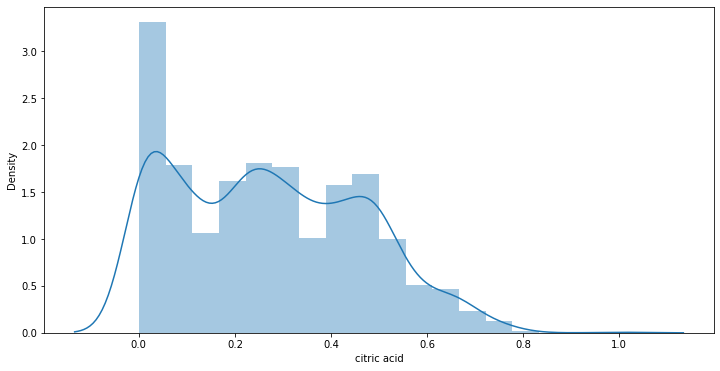

In [68]:
ax = sns.distplot(dados['citric acid'])
ax.figure.set_size_inches(12, 6)
ax

In [69]:
Moda = dados['citric acid'].mode()
Moda

0    0.0
Name: citric acid, dtype: float64

In [70]:
Mediana = dados['citric acid'].median()
Mediana

0.26

In [71]:
Media = dados['citric acid'].mean()
Media

0.2709756097560964

In [ ]:
ax = sns.distplot(dados['alcohol'])
ax.figure.set_size_inches(12, 6)
ax